In [2]:
import pandas as pd
import chardet
import csv

In [3]:
df = pd.read_csv('to_group_11_29_23_arrond_interet_2015_clip_East_West_Axis_Joint_Count1.csv', delimiter=',', encoding='utf-8' )
# Define a function to replace 'ÃƒÂ©' with 'é'
def replace_special_chars(value):
    return str(value).replace('ÃƒÂ©', 'é')


# Apply the function to each cell in the DataFrame
df = df.applymap(replace_special_chars)
df

,OBJECTID_12,ï..oid_,aq_match_type,aq_longlabel,aq_shortlabel,aq_place_addr,aq_rank,aq_addnum,aq_stname,aq_staddr,...,CODEID.1,NOM.1,NOM_OFFICI.1,CODEMAMH.1,CODE_3C.1,NUM.1,ABREV.1,TYPE.1,COMMENT.1,DATEMODIF.1
0,1,63540,A,"1405 Notre-Dame, Montréal, H8S 2E2",1405 Notre-Dame,"1405 Notre-Dame, Montréal, H8S 2E2",20,1405,Notre-Dame,1405 Notre-Dame,...,9,Lachine,Lachine,REM27,LAC,17,LC,Arrondissement,,2022-08-24
1,2,63731,A,"1675 Notre-Dame, Montréal, H8S 2E5",1675 Notre-Dame,"1675 Notre-Dame, Montréal, H8S 2E5",20,1675,Notre-Dame,1675 Notre-Dame,...,9,Lachine,Lachine,REM27,LAC,17,LC,Arrondissement,,2022-08-24
2,3,123578,A,"5751 Sherbrooke, Montréal, H4A 0A6",5751 Sherbrooke,"5751 Sherbrooke, Montréal, H4A 0A6",20,5751,Sherbrooke,5751 Sherbrooke,...,20,Côte-des-Neiges-Notre-Dame-de-Grâce,Côte-des-Neiges–Notre-Dame-de-Grâce,REM34,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24
3,4,125039,A,"5651 Sherbrooke, Montréal, H4A 1W6",5651 Sherbrooke,"5651 Sherbrooke, Montréal, H4A 1W6",20,5651,Sherbrooke,5651 Sherbrooke,...,20,Côte-des-Neiges-Notre-Dame-de-Grâce,Côte-des-Neiges–Notre-Dame-de-Grâce,REM34,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24
4,5,125808,A,"5592 Sherbrooke, Montréal, H4A 1W3",5592 Sherbrooke,"5592 Sherbrooke, Montréal, H4A 1W3",20,5592,Sherbrooke,5592 Sherbrooke,...,20,Côte-des-Neiges-Notre-Dame-de-Grâce,Côte-des-Neiges–Notre-Dame-de-Grâce,REM34,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,433555,A,"4124 Jean-Talon, Montréal, H1S 2V4",4124 Jean-Talon,"4124 Jean-Talon, Montréal, H1S 2V4",20,4124,Jean-Talon,4124 Jean-Talon,...,19,Villeray-Saint-Michel-Parc-Extension,Villeray–Saint-Michel–Parc-Extension,REM25,VSE,26,VS,Arrondissement,,2022-08-24
114,115,438262,A,"7970 18e Avenue, Montréal, H1Z 3R8",7970 18e Avenue,"7970 18e Avenue, Montréal, H1Z 3R8",20,7970,18e Avenue,7970 18e Avenue,...,19,Villeray-Saint-Michel-Parc-Extension,Villeray–Saint-Michel–Parc-Extension,REM25,VSE,26,VS,Arrondissement,,2022-08-24
115,116,448428,A,"2180 Fleury, Montréal, H2B 1K3",2180 Fleury,"2180 Fleury, Montréal, H2B 1K3",20,2180,Fleury,2180 Fleury,...,17,Ahuntsic-Cartierville,Ahuntsic-Cartierville,REM23,AHU,24,AC,Arrondissement,,2022-08-24
116,117,475580,A,"6774 Sherbrooke, Montréal, H1N 1E1",6774 Sherbrooke,"6774 Sherbrooke, Montréal, H1N 1E1",20,6774,Sherbrooke,6774 Sherbrooke,...,16,Mercier-Hochelaga-Maisonneuve,Mercier–Hochelaga-Maisonneuve,REM22,MHM,23,MH,Arrondissement,,2022-08-24


# Reproject epsg:3798 to epsg:4326

In [5]:
import pandas as pd
from pyproj import Proj, transform

# Assuming your DataFrame is named df and the column names are 'x' and 'y'
# Adjust the column names according to your actual DataFrame
x_coords = df['aq_x'].values
y_coords = df['aq_y'].values

# Define the projection for EPSG:3798 and EPSG:4326
proj_epsg_3798 = Proj(init='epsg:3798')
proj_epsg_4326 = Proj(init='epsg:4326')

# Convert coordinates to WGS84
lon, lat = transform(proj_epsg_3798, proj_epsg_4326, x_coords, y_coords)

# Create a new DataFrame with WGS84 coordinates
df_wgs84 = pd.DataFrame({'lon': lon, 'lat': lat})

df_wgs84 = pd.concat([df, df_wgs84], axis=1)

# Display the resulting DataFrame
print(df_wgs84)

    OBJECTID_12 ï..oid_ aq_match_type                        aq_longlabel  \
0             1   63540             A  1405 Notre-Dame, Montréal, H8S 2E2   
1             2   63731             A  1675 Notre-Dame, Montréal, H8S 2E5   
2             3  123578             A  5751 Sherbrooke, Montréal, H4A 0A6   
3             4  125039             A  5651 Sherbrooke, Montréal, H4A 1W6   
4             5  125808             A  5592 Sherbrooke, Montréal, H4A 1W3   
..          ...     ...           ...                                 ...   
113         114  433555             A  4124 Jean-Talon, Montréal, H1S 2V4   
114         115  438262             A  7970 18e Avenue, Montréal, H1Z 3R8   
115         116  448428             A      2180 Fleury, Montréal, H2B 1K3   
116         117  475580             A  6774 Sherbrooke, Montréal, H1N 1E1   
117         118  506424             A     3187 Mercier, Montréal, H1L 5J5   

       aq_shortlabel                       aq_place_addr aq_rank aq_addnum 

/home/thebreadinbed/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/thebreadinbed/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_4981/1725498947.py:14: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = trans

In [105]:
for column_name in df.columns:
    print(column_name)

ï..oid_
aq_match_type
aq_longlabel
aq_shortlabel
aq_place_addr
aq_rank
aq_addnum
aq_stname
aq_staddr
aq_city
aq_postal
aq_postalext
aq_cntryname
aq_langcode
aq_distance
aq_x
aq_y
aq_displayx
aq_displayy
aq_xmin
aq_xmax
aq_ymin
aq_ymax
aq_exinfo
aq_singleline
aq_countrycode
neq
no_suf_etab
ind_etab_princ
cod_stat_etab
ind_vente_tabac_detl
dat_init_decl
dat_fin_decl
ind_salon_bronz
stat_etab
nom_etab
stat_nom
dat_initl_declr
dat_final_declr
typ_nom_etab
dat_init_nom_etab
dat_fin_nom_etab
ind_nom_fran
no_act_econ_etab
cod_act_econ
cae_description
cae_famille
cae_groupe
cae_division
no_adr_regst
dat_deb_vald
dat_fin
lign1_adr
lign2_adr
lign3_adr
cod_loclt
cod_post
prov_etat
pays
cod_stat_adr
ind_hors_qc
no_seq_no_civiq
casr_post
ind_disp
no_civq
no_app
cod_point_cardn
cod_typ_rue
nom_rue
vil
lign1_adr_form
lign2_adr_form
lign3_adr_form
lign4_adr_form
lign_adr_compl
adresse_nac_registre
nac_registre
naci_registre
code_decision_nac_registre
desc_code_dec_nac_registre
f_dat_fin
f_dat_deb_vald

In [6]:
# copying the original dataframe to a clean one
df_clean = df_wgs84.copy()

# applying the fillna to fill null values from another column
df_clean['cae_description'] = df_clean['cae_description'].fillna(df_clean['cae_famille'])
df_clean

,OBJECTID_12,ï..oid_,aq_match_type,aq_longlabel,aq_shortlabel,aq_place_addr,aq_rank,aq_addnum,aq_stname,aq_staddr,...,NOM_OFFICI.1,CODEMAMH.1,CODE_3C.1,NUM.1,ABREV.1,TYPE.1,COMMENT.1,DATEMODIF.1,lon,lat
0,1,63540,A,"1405 Notre-Dame, Montréal, H8S 2E2",1405 Notre-Dame,"1405 Notre-Dame, Montréal, H8S 2E2",20,1405,Notre-Dame,1405 Notre-Dame,...,Lachine,REM27,LAC,17,LC,Arrondissement,,2022-08-24,-73.676646,45.434763
1,2,63731,A,"1675 Notre-Dame, Montréal, H8S 2E5",1675 Notre-Dame,"1675 Notre-Dame, Montréal, H8S 2E5",20,1675,Notre-Dame,1675 Notre-Dame,...,Lachine,REM27,LAC,17,LC,Arrondissement,,2022-08-24,-73.679062,45.434898
2,3,123578,A,"5751 Sherbrooke, Montréal, H4A 0A6",5751 Sherbrooke,"5751 Sherbrooke, Montréal, H4A 0A6",20,5751,Sherbrooke,5751 Sherbrooke,...,Côte-des-Neiges–Notre-Dame-de-Grâce,REM34,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24,-73.616949,45.470313
3,4,125039,A,"5651 Sherbrooke, Montréal, H4A 1W6",5651 Sherbrooke,"5651 Sherbrooke, Montréal, H4A 1W6",20,5651,Sherbrooke,5651 Sherbrooke,...,Côte-des-Neiges–Notre-Dame-de-Grâce,REM34,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24,-73.615212,45.471177
4,5,125808,A,"5592 Sherbrooke, Montréal, H4A 1W3",5592 Sherbrooke,"5592 Sherbrooke, Montréal, H4A 1W3",20,5592,Sherbrooke,5592 Sherbrooke,...,Côte-des-Neiges–Notre-Dame-de-Grâce,REM34,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24,-73.613246,45.471609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,114,433555,A,"4124 Jean-Talon, Montréal, H1S 2V4",4124 Jean-Talon,"4124 Jean-Talon, Montréal, H1S 2V4",20,4124,Jean-Talon,4124 Jean-Talon,...,Villeray–Saint-Michel–Parc-Extension,REM25,VSE,26,VS,Arrondissement,,2022-08-24,-73.589157,45.566487
114,115,438262,A,"7970 18e Avenue, Montréal, H1Z 3R8",7970 18e Avenue,"7970 18e Avenue, Montréal, H1Z 3R8",20,7970,18e Avenue,7970 18e Avenue,...,Villeray–Saint-Michel–Parc-Extension,REM25,VSE,26,VS,Arrondissement,,2022-08-24,-73.603611,45.568044
115,116,448428,A,"2180 Fleury, Montréal, H2B 1K3",2180 Fleury,"2180 Fleury, Montréal, H2B 1K3",20,2180,Fleury,2180 Fleury,...,Ahuntsic-Cartierville,REM23,AHU,24,AC,Arrondissement,,2022-08-24,-73.650366,45.571806
116,117,475580,A,"6774 Sherbrooke, Montréal, H1N 1E1",6774 Sherbrooke,"6774 Sherbrooke, Montréal, H1N 1E1",20,6774,Sherbrooke,6774 Sherbrooke,...,Mercier–Hochelaga-Maisonneuve,REM22,MHM,23,MH,Arrondissement,,2022-08-24,-73.541687,45.584487


In [7]:
df_column = df_clean['cae_description']
df_column

0                                                    nan
1                        Autres services aux entreprises
2                                Services d'informatique
3                      Bureaux de conseillers en gestion
4                                                    nan
                             ...                        
113                     Restaurants sans permis d'alcool
114                          Agences de publicitÃƒÆ’Ã‚Â©
115                                                  nan
116    Autres services de tÃƒÆ’Ã‚Â©lÃƒÆ’Ã‚Â©communica...
117                                Bureaux de comptables
Name: cae_description, Length: 118, dtype: object

In [117]:
type(df_column)

pandas.core.series.Series

In [8]:
# Define a function to replace characters in the 'cae_description' column
def replace_special_chars(description):
    # Replace 'ÃƒÆ’Ã‚Â¢' with 'â'
    description = description.replace('ÃƒÆ’Ã‚Â¢', 'â')
    # Replace 'ÃƒÆ’Ã‚Â©' with 'é'
    description = description.replace('ÃƒÆ’Ã‚Â©', 'é')
    # Replace 'vÃƒÆ’Ã‚Âª' with 'ê'
    description = description.replace('vÃƒÆ’Ã‚Âª', 'ê')
     # Replace 'ÃƒÆ’Ã‚Âª' with 'ê'
    description = description.replace('ÃƒÆ’Ã‚Âª', 'ê')
    # Replace 'ÃƒÆ’Ã¢â‚¬Â°' with 'é'
    description = description.replace('ÃƒÆ’Ã¢â‚¬Â°', 'é')
    # Replace 'ÃƒÆ’Ã‚Â¨' with 'è'
    description = description.replace('ÃƒÆ’Ã‚Â¨', 'è')
    # Replace 'ÃƒÆ’Ã‚Â´' with 'ô'
    description = description.replace('ÃƒÆ’Ã‚Â´', 'ô')
    # Replace 'ÃƒÆ’Ã‚Â§' with 'ç'
    description = description.replace('ÃƒÆ’Ã‚Â§', 'ç')
     # Replace 'ÃƒÆ’Ã‚Â®' with 'î'
    description = description.replace('ÃƒÆ’Ã‚Â®', 'î')
    # Replace 'ÃƒÆ’Ã‚Â ' with 'à'
    description = description.replace('ÃƒÆ’Ã‚Â', 'à')
    description = description.replace('\xa0', '')
    description = description.replace("ÃƒÂ¢Ã¢â€šÂ¬Ã¢â€žÂ¢", "'")
    
    return description

# Apply the function to the 'cae_description' column
df_clean['cae_description'] = df_clean['cae_description'].apply(replace_special_chars)


In [9]:
import pandas as pd

# Assuming df_clean is your DataFrame
# Use pd.notna() to check for NaN values
df_clean = df_clean[pd.notna(df_clean['cae_description'])]

# Drop rows where 'cae_description' is equal to the specified strings
strings_to_drop = ['Autres services aux entreprises', 'Information non déclarée', 'nan', 'Autres services', 'Autres types de commerce de gros']
df_clean = df_clean[~df_clean['cae_description'].isin(strings_to_drop)]

In [10]:
# # Convert the 'cae_description' column to a list
cae_description_list2 = df_clean['cae_description'].tolist()
cae_description_list2

["Services d'informatique",
 'Bureaux de conseillers en gestion',
 'Autres industries du bois',
 'Exploitants de bâtiments résidentiels et de logements',
 'Agences de publicité',
 'Autres services de divertissement et de loisirs',
 "Autres services d'enseignement",
 'Salons de coiffure et de beauté pour hommes et femmes',
 "Restaurants avec permis d'alcool",
 "Agences d'assurances",
 'Agences ou courtiers immobiliers',
 "Autres services d'enseignement",
 'Services de location de personnel',
 'Industrie des journaux (impression et édition combinées)',
 'Industrie de la préservation du bois',
 'Organisations civiques et amicales',
 'Commerce de détail de médicaments brevetés et de produits de toilette',
 "Restaurants avec permis d'alcool",
 'Bureaux de placement',
 "Autres magasins d'alimentation spécialisés n.c.a.",
 'Commerce de détail de chaussures pour la famille',
 'Commerce de détail de chaussures pour la famille',
 'Autres types de commerce de détail de êtements',
 'Magasins génér

### Test #1 Clustering using TF-IDF Vectorization and Kmeans to find natural clusters based on data 

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd

# Convert the list of dictionaries to a DataFrame
df_2 = pd.DataFrame(cae_description_list2)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_2[0])

# K-means clustering
k =   10# You can adjust the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
df_2['cluster'] = labels

# Print the resulting clusters
for i in range(k):
    cluster_categories = df_2[df_2['cluster'] == i][0].tolist()
    print(f"Cluster {i + 1}:\n", cluster_categories)

Cluster 1:
 ["Autres magasins d'alimentation spécialisés n.c.a.", 'Magasins généraux', 'Banques à charte', 'épiceries (sauf supermarchés)', 'Industrie des êtements pour enfants', "Concessionnaires d'automobiles d'occasion", 'Syndicats ouvriers', 'Stations-service', 'Garages (réparations générales)']
Cluster 2:
 ["Services d'informatique", 'Autres services de divertissement et de loisirs', "Autres services d'enseignement", "Autres services d'enseignement", 'Services de location de personnel', 'Organismes de planification et de soutien des services sociaux', "Services de sécurité et d'enquêtes", "Services de conciergerie et d'entretien", "Services d'informatique", "Autres services d'enseignement", 'Autres services administratifs généraux', 'Autres services de télécommunications']
Cluster 3:
 ['Autres industries du bois', 'Salons de coiffure et de beauté pour hommes et femmes', 'Industrie des journaux (impression et édition combinées)', 'Industrie de la préservation du bois', 'Commerce de

/home/thebreadinbed/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Test #2 Clustering using TF-IDF Vectorization and Ward Linkage Hierarchical clustering to find natural clusters based on data 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import pandas as pd
import matplotlib.pyplot as plt

# Convert the list of dictionaries to a DataFrame
df_2 = pd.DataFrame(cae_description_list2)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_2[0])

# Perform hierarchical clustering
# You can choose different linkage methods (e.g., 'single', 'complete', 'average')
linkage_matrix = linkage(X.toarray(), method='ward')

# # Plot the dendrogram
# dendrogram(linkage_matrix, orientation='top', labels=df_2[0].tolist(), leaf_font_size=8)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Data Points')
# plt.ylabel('Distance')
# plt.show()

# Extract clusters based on a distance threshold
distance_threshold = 1.2# Adjust this threshold based on the dendrogram
clusters = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

# Add cluster labels to the DataFrame
df_2['cluster'] = clusters

# Print the resulting clusters
for i in range(max(clusters)):
    cluster_categories = df_2[df_2['cluster'] == i][0].tolist()
    print(f"Cluster {i}:\n", cluster_categories)

Cluster 0:
 []
Cluster 1:
 ["Restaurants avec permis d'alcool", "Restaurants avec permis d'alcool", "Restaurants avec permis d'alcool", "Restaurants avec permis d'alcool", "Restaurants avec permis d'alcool", "Restaurants avec permis d'alcool", "Restaurants avec permis d'alcool", "Restaurants avec permis d'alcool", "Restaurants avec permis d'alcool", "Restaurants avec permis d'alcool"]
Cluster 2:
 ["Restaurants sans permis d'alcool", "Restaurants sans permis d'alcool"]
Cluster 3:
 ['Agences de publicité', 'Agences de publicité', 'Agences de publicité']
Cluster 4:
 ['Agences ou courtiers immobiliers', 'Agences ou courtiers immobiliers', 'Agences ou courtiers immobiliers', 'Agences ou courtiers immobiliers']
Cluster 5:
 ['Sociétés de portefeuille (holdings)', 'Sociétés de portefeuille (holdings)', 'Sociétés de portefeuille (holdings)', 'Sociétés de portefeuille (holdings)']
Cluster 6:
 ["Sociétés d'assurance-vie", "Sociétés d'assurance-vie"]
Cluster 7:
 ["Sociétés d'investissement"]
Clust

In [13]:
# Assuming you want to rename the 'cae_description' column to 'description'
df_2 = df_2.rename(columns={0: 'description'})
df_2

,description,cluster
0,Services d'informatique,15
1,Bureaux de conseillers en gestion,12
2,Autres industries du bois,22
3,Exploitants de bâtiments résidentiels et de lo...,19
4,Agences de publicité,3
...,...,...
78,Organisations religieuses,18
79,Restaurants sans permis d'alcool,2
80,Agences de publicité,3
81,Autres services de télécommunications,26


In [22]:
# Merge the original DataFrame with the clustered DataFrame based on the index or a unique identifier
df_combined = pd.merge(df_clean, df_2, left_index=True, right_index=True)
df_combined = pd.DataFrame(df_combined)
# Print the resulting DataFrame with the cluster information
df_combined

,OBJECTID_12,ï..oid_,aq_match_type,aq_longlabel,aq_shortlabel,aq_place_addr,aq_rank,aq_addnum,aq_stname,aq_staddr,...,CODE_3C.1,NUM.1,ABREV.1,TYPE.1,COMMENT.1,DATEMODIF.1,lon,lat,description,cluster
2,3,123578,A,"5751 Sherbrooke, Montréal, H4A 0A6",5751 Sherbrooke,"5751 Sherbrooke, Montréal, H4A 0A6",20,5751,Sherbrooke,5751 Sherbrooke,...,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24,-73.616949,45.470313,Autres industries du bois,22
3,4,125039,A,"5651 Sherbrooke, Montréal, H4A 1W6",5651 Sherbrooke,"5651 Sherbrooke, Montréal, H4A 1W6",20,5651,Sherbrooke,5651 Sherbrooke,...,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24,-73.615212,45.471177,Exploitants de bâtiments résidentiels et de lo...,19
5,6,125633,A,"5999 Monkland, Montréal, H4A 1H1",5999 Monkland,"5999 Monkland, Montréal, H4A 1H1",20,5999,Monkland,5999 Monkland,...,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24,-73.626980,45.471528,Autres services de divertissement et de loisirs,26
6,7,125636,A,"5999 Monkland, Montréal, H4A 1H1",5999 Monkland,"5999 Monkland, Montréal, H4A 1H1",20,5999,Monkland,5999 Monkland,...,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24,-73.626980,45.471528,Autres services d'enseignement,16
7,8,150004,A,"222 Dominion, Montréal, H3J 2X1",222 Dominion,"222 Dominion, Montréal, H3J 2X1",20,222,Dominion,222 Dominion,...,LSO,21,SO,Arrondissement,Il est important de noter que la limite située...,2022-08-24,-73.572498,45.482823,Salons de coiffure et de beauté pour hommes et...,40
9,10,172613,A,"1370 Notre-Dame, Montréal, H3C 1K8",1370 Notre-Dame,"1370 Notre-Dame, Montréal, H3C 1K8",20,1370,Notre-Dame,1370 Notre-Dame,...,LSO,21,SO,Arrondissement,Il est important de noter que la limite située...,2022-08-24,-73.565199,45.491985,Agences d'assurances,38
11,12,173716,A,"1922 Sainte-Catherine, Montréal, H3H 1M4",1922 Sainte-Catherine,"1922 Sainte-Catherine, Montréal, H3H 1M4",20,1922,Sainte-Catherine,1922 Sainte-Catherine,...,VIM,20,VM,Arrondissement,,2022-08-24,-73.580463,45.492309,Autres services d'enseignement,16
13,14,178581,A,"4883 Van Horne, Montréal, H3W 1J2",4883 Van Horne,"4883 Van Horne, Montréal, H3W 1J2",20,4883,Van Horne,4883 Van Horne,...,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24,-73.638877,45.493749,Industrie des journaux (impression et édition ...,21
14,15,180127,A,"4845 Kent, Montréal, H3W 1H4",4845 Kent,"4845 Kent, Montréal, H3W 1H4",20,4845,Kent,4845 Kent,...,CDN,27,CN,Arrondissement,Il est important de noter que la limite située...,2022-08-24,-73.639584,45.494208,Industrie de la préservation du bois,22
16,17,195278,A,"1233 Montagne, Montréal, H3G 1Z2",1233 Montagne,"1233 Montagne, Montréal, H3G 1Z2",20,1233,Montagne,1233 Montagne,...,VIM,20,VM,Arrondissement,,2022-08-24,-73.574303,45.497817,Commerce de détail de médicaments brevetés et ...,11


### Example of remaining steps to rename my clusters If I were to find a suitable algorithm to cluster the data  

In [124]:
# Map cluster labels to desired names
cluster_names = {
    1: 'Restaurants avec permis d"alcool',
    2: 'Restaurants sans permis d"alcool',
    3: 'Agences de publicité',
    4: 'Agences ou courtiers immobiliers',
    5: 'Sociétés de portefeuille (holdings)',
    6: 'Sociétés d"assurance-vie',
    7: 'Sociétés d"investissement',
    8: 'Commerce de détail de chaussures pour la famille'
    
    # Add more mappings as needed
}

# Add cluster labels to the DataFrame
df_2['cluster'] = clusters

# Create a new column 'cluster_assignment' with cluster names
df_2['cluster_assignment'] = df_2['cluster'].map(cluster_names)

# Print the resulting DataFrame with the new 'cluster_assignment' column
print(df_2)

                                                    0  cluster  \
0                             Services d'informatique       15   
1                   Bureaux de conseillers en gestion       12   
2                           Autres industries du bois       22   
3   Exploitants de bâtiments résidentiels et de lo...       19   
4                                Agences de publicité        3   
..                                                ...      ...   
78                          Organisations religieuses       18   
79                   Restaurants sans permis d'alcool        2   
80                               Agences de publicité        3   
81              Autres services de télécommunications       26   
82                              Bureaux de comptables       14   

                  cluster_assignment  
0                                NaN  
1                                NaN  
2                                NaN  
3                                NaN  
4           

In [37]:
# # Get unique categories
# Assuming df_clean is your DataFrame
unique_categories = df_combined['description'].unique()

# # # Loop through each category
for category in unique_categories :
    # Filter rows with the current category
    category_df = df_combined[df_combined['description'] == category]
    
    # Calculate the centroid
    centroid_lon = category_df['lon'].mean()
    centroid_lat = category_df['lat'].mean()

    print(f"Centroid of {category}:")
    print("Longitude:", centroid_lon)
    print("Latitude:", centroid_lat)
    print()

Centroid of Autres industries du bois:
Longitude: -73.61694919817505
Latitude: 45.47031292563712

Centroid of Exploitants de bâtiments résidentiels et de logements:
Longitude: -73.61521214117225
Latitude: 45.471177084293295

Centroid of Autres services de divertissement et de loisirs:
Longitude: -73.62697972946923
Latitude: 45.47152800667538

Centroid of Autres services d'enseignement:
Longitude: -73.59043504685587
Latitude: 45.49098900465645

Centroid of Salons de coiffure et de beauté pour hommes et femmes:
Longitude: -73.57249812867587
Latitude: 45.482822997917914

Centroid of Agences d'assurances:
Longitude: -73.56519903858974
Latitude: 45.49198500533231

Centroid of Industrie des journaux (impression et édition combinées):
Longitude: -73.63887747779883
Latitude: 45.49374893746539

Centroid of Industrie de la préservation du bois:
Longitude: -73.63958406043658
Latitude: 45.49420792014785

Centroid of Commerce de détail de médicaments brevetés et de produits de toilette:
Longitude: 

In [42]:
import pandas as pd
from geopy.distance import geodesic
from itertools import product

# Get unique categories
categories = df_combined['description'].unique()

# Initialize an empty distance matrix
distance_matrix = pd.DataFrame(index=categories, columns=categories)

# Loop through each pair of categories
for category1, category2 in product(categories, repeat=2):
    # Filter rows for the current categories
    category1_df = df_combined[df_combined['description'] == category1]
    category2_df = df_combined[df_combined['description'] == category2]
    
    # Check if the DataFrames are not empty
    if not category1_df.empty and not category2_df.empty:
        # Calculate the centroid for each category
        centroid1_lon = category1_df['lon'].mean()
        centroid1_lat = category1_df['lat'].mean()
        
        centroid2_lon = category2_df['lon'].mean()
        centroid2_lat = category2_df['lat'].mean()
        
        # Calculate the distance between centroids using geodesic
        distance = geodesic((centroid1_lat, centroid1_lon), (centroid2_lat, centroid2_lon)).meters
        
        # Update the distance matrix
        distance_matrix.loc[category1, category2] = distance

# Display the distance matrix
print("Distance Matrix:")
print(distance_matrix)


Distance Matrix:
                                                   Autres industries du bois  \
Autres industries du bois                                                0.0   
Exploitants de bâtiments résidentiels et de log...                166.359765   
Autres services de divertissement et de loisirs                   795.910859   
Autres services d'enseignement                                   3094.831797   
Salons de coiffure et de beauté pour hommes et ...               3743.435544   
Agences d'assurances                                              4708.72574   
Industrie des journaux (impression et édition c...               3118.288127   
Industrie de la préservation du bois                             3191.317898   
Commerce de détail de médicaments brevetés et d...               4523.336396   
Restaurants avec permis d'alcool                                 5295.579488   
Autres magasins d'alimentation spécialisés n.c.a.                4353.784664   
Commerce de détail de c

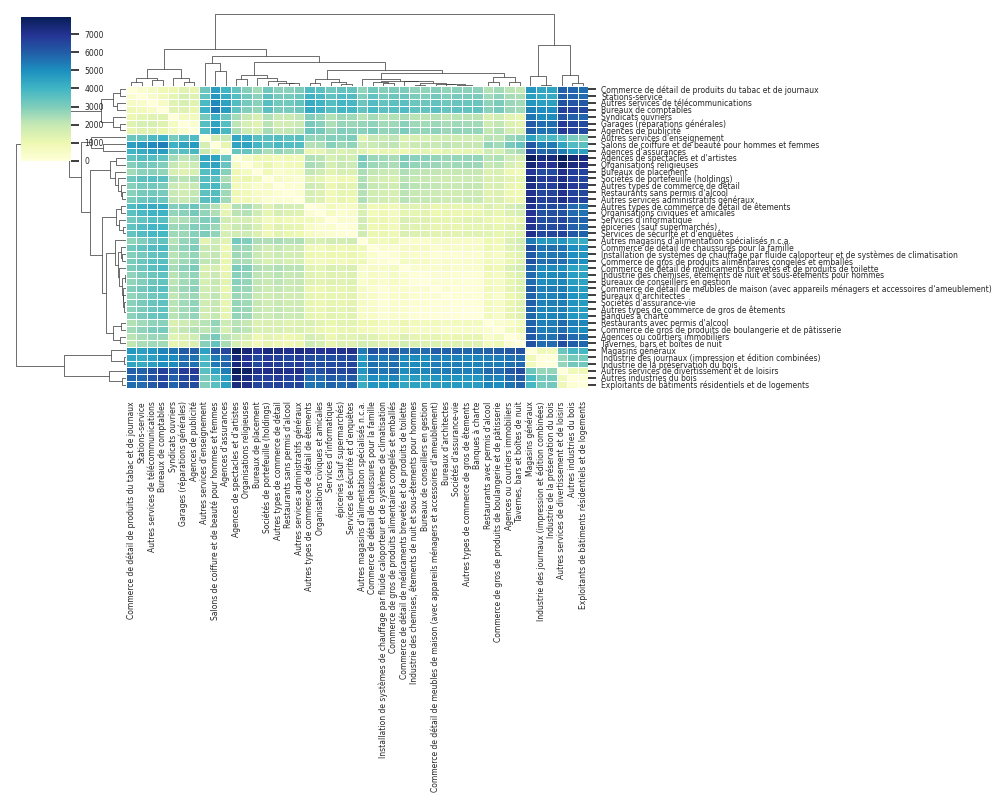

In [45]:
import pandas as pd
from geopy.distance import geodesic
from itertools import product
import seaborn as sns
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Get unique categories
categories = df_combined['description'].unique()

# Initialize an empty distance matrix
distance_matrix = pd.DataFrame(index=categories, columns=categories)

# Loop through each pair of categories
for category1, category2 in product(categories, repeat=2):
    # Filter rows for the current categories
    category1_df = df_combined[df_combined['description'] == category1]
    category2_df = df_combined[df_combined['description'] == category2]
    
    # Calculate the centroid for each category
    centroid1_lon = category1_df['lon'].mean()
    centroid1_lat = category1_df['lat'].mean()
    
    centroid2_lon = category2_df['lon'].mean()
    centroid2_lat = category2_df['lat'].mean()
    
    # Calculate the distance between centroids using geodesic
    distance = geodesic((centroid1_lat, centroid1_lon), (centroid2_lat, centroid2_lon)).meters
    
    # Update the distance matrix
    distance_matrix.loc[category1, category2] = distance
    
# Convert the distance matrix to a numeric type
distance_matrix = distance_matrix.apply(pd.to_numeric, errors='coerce')

# Convert the distance matrix to a condensed form
condensed_distance = squareform(distance_matrix.values)

# Perform hierarchical clustering
linkage_matrix = linkage(condensed_distance, method='average')

# Plot the dendrogram heatmap
sns.set(font_scale=0.5)
g = sns.clustermap(distance_matrix, row_linkage=linkage_matrix, col_linkage=linkage_matrix, cmap="YlGnBu", linewidths=0.5, figsize=(10, 8))
plt.show()

In [55]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming 'cae_description' is the column containing the descriptions in your DataFrame
descriptions = df['cae_description']

# Create a CountVectorizer to get term frequencies
cv = CountVectorizer()
word_count_vector = cv.fit_transform(descriptions)

# Create a TfidfTransformer
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)

# Fit and transform the term frequencies to obtain the TF-IDF matrix
tfidf_matrix = tfidf_transformer.fit_transform(word_count_vector)

# Access the IDF values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names_out(), columns=["idf_weights"])

# Sort in ascending order
df_idf = df_idf.sort_values(by=['idf_weights'])

# Display the DataFrame with IDF values
print(df_idf)

              idf_weights
de               1.859066
nan              2.391483
autres           2.522668
et               2.551786
services         2.649296
...                   ...
isolation       11.004441
ses             11.004441
oduc            11.004441
ophtalmiques    11.004441
remorquage      11.004441

[1050 rows x 1 columns]


In [59]:
#instantiate CountVectorizer() 
cv=CountVectorizer() 

# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(cae_description_list)
word_count_vector.shape

(33244, 997)